In [1]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# modeling

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop(columns='target')#kolom feature data(seluruh kolom dataset dikurangi kolom target)=>drop
y=df['target']#kolom target

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.80,stratify=y,random_state=42)
#regresi gapake stratify,regresi targetnya continous
#kalo isi numerik continous dan banyak itu regresi
#kalo 2 3 6 itu klasifikasi
#kalo outputnya yg ada di dataset alias ga ada yg lain itu klasifikasi, walaupn itu numerik
#kalau outputnya di luar dataset itu regresi
#stratify buat handle imbalance

# machine learning modelling

# base model

## logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
LogReg = LogisticRegression()

In [10]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [11]:
LogRegPredtrain = LogReg.predict(X_train)
LogRegPredtest = LogReg.predict(X_test)

In [52]:
print(f"score train {LogReg.score(X_train,y_train)}")
print(f"score test {LogReg.score(X_test,y_test)}")

score train 0.8429752066115702
score test 0.8032786885245902


## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn=KNeighborsClassifier()

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knnPredtrain = knn.predict(X_train)
knnRegPredtest = knn.predict(X_test)

In [53]:
print(f"score train {knn.score(X_train,y_train)}")
print(f"score test {knn.score(X_test,y_test)}")

score train 0.7520661157024794
score test 0.5901639344262295


## random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf=RandomForestClassifier()

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfPredtrain = rf.predict(X_train)
rfRegPredtest = rf.predict(X_test)

In [54]:
print(f"score train {rf.score(X_train,y_train)}")
print(f"score test {rf.score(X_test,y_test)}")

score train 1.0
score test 0.7704918032786885


## extreme gradient boosting classifier

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb=XGBClassifier()

In [22]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
xgbPredtrain = xgb.predict(X_train)
xgbRegPredtest = xgb.predict(X_test)

In [55]:
print(f"score train {xgb.score(X_train,y_train)}")
print(f"score test {xgb.score(X_test,y_test)}")

score train 1.0
score test 0.8032786885245902


## evaluations matrix result comparison

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

## logreg

In [25]:
acc_logReg=accuracy_score(y_test,LogRegPredtest)
acc_logReg

0.8032786885245902

In [26]:
prec_log=precision_score(y_test,LogRegPredtest)
prec_log

0.7692307692307693

In [27]:
rec_log=recall_score(y_test,LogRegPredtest)
rec_log

0.9090909090909091

In [28]:
f1_log=f1_score(y_test,LogRegPredtest)
f1_log

0.8333333333333333

In [29]:
recall_score(y_test,LogRegPredtest,pos_label=0)

0.6785714285714286

In [30]:
print(classification_report(y_test,LogRegPredtest))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



## KNN

In [31]:
acc_knn=accuracy_score(y_test,knnRegPredtest)
acc_knn

0.5901639344262295

In [32]:
prec_knn=precision_score(y_test,knnRegPredtest)
prec_knn

0.625

In [33]:
rec_knn=recall_score(y_test,knnRegPredtest)
rec_knn

0.6060606060606061

In [34]:
f1_knn=f1_score(y_test,knnRegPredtest)
f1_knn

0.6153846153846154

In [35]:
recall_score(y_test,knnRegPredtest,pos_label=0)

0.5714285714285714

In [36]:
print(classification_report(y_test,knnRegPredtest))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.62      0.61      0.62        33

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61



## random forest

In [37]:
acc_rf=accuracy_score(y_test,rfRegPredtest)
acc_rf

0.7704918032786885

In [38]:
prec_rf=precision_score(y_test,rfRegPredtest)
prec_rf

0.7435897435897436

In [39]:
rec_rf=recall_score(y_test,rfRegPredtest)
rec_rf

0.8787878787878788

In [40]:
f1_rf=f1_score(y_test,rfRegPredtest)
f1_rf

0.8055555555555556

In [41]:
recall_score(y_test,rfRegPredtest,pos_label=0)

0.6428571428571429

In [42]:
print(classification_report(y_test,rfRegPredtest))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



## extreme gradient boosting classifier

In [43]:
acc_xgb=accuracy_score(y_test,xgbRegPredtest)
acc_xgb

0.8032786885245902

In [44]:
prec_xgb=precision_score(y_test,xgbRegPredtest)
prec_xgb

0.7692307692307693

In [45]:
rec_xgb=recall_score(y_test,xgbRegPredtest)
rec_xgb

0.9090909090909091

In [46]:
f1_xgb=f1_score(y_test,xgbRegPredtest)
f1_xgb

0.8333333333333333

In [47]:
recall_score(y_test,xgbRegPredtest,pos_label=0)

0.6785714285714286

In [48]:
print(classification_report(y_test,xgbRegPredtest))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



# confusion matrix

ini hasil evaluation matrix logistic regression


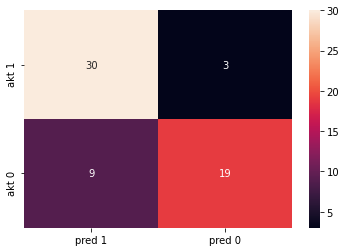

ini hasil evaluation matrix knn


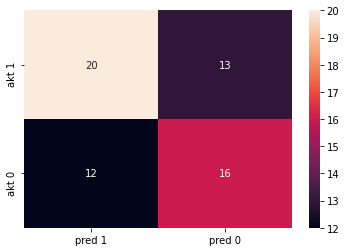

ini hasil evaluation matrix random forest


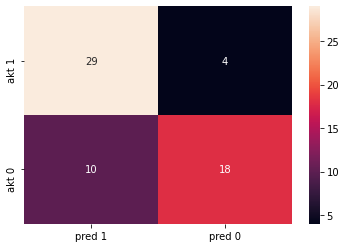

ini hasil evaluation matrix xgboost


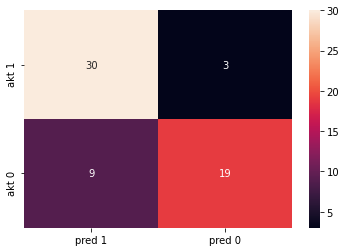

In [49]:
#logreg
cm_logreg=confusion_matrix(y_test,LogRegPredtest,labels=[1,0])
df_cm_logreg=pd.DataFrame(data=cm_logreg,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_logreg,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

#knn
cm_knn=confusion_matrix(y_test,knnRegPredtest,labels=[1,0])
df_cm_knn=pd.DataFrame(data=cm_knn,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_knn,annot=True)
print("ini hasil evaluation matrix knn")
plt.show()

#randomforest
cm_rf=confusion_matrix(y_test,rfRegPredtest,labels=[1,0])
df_cm_rf=pd.DataFrame(data=cm_rf,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_rf,annot=True)
print("ini hasil evaluation matrix random forest")
plt.show()

#xgboost
cm_xgb=confusion_matrix(y_test,xgbRegPredtest,labels=[1,0])
df_cm_xgb=pd.DataFrame(data=cm_xgb,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_xgb,annot=True)
print("ini hasil evaluation matrix xgboost")
plt.show()

In [51]:
data={
    'LogReg':[acc_logReg,prec_log,rec_log,f1_log],
    'KNN':[acc_knn,prec_knn,rec_knn,f1_knn],
    'RF':[acc_rf,prec_rf,rec_rf,f1_rf],
    'XGBoost':[acc_xgb,prec_xgb,rec_xgb,f1_xgb]
}
pd.DataFrame(data=data,index=['Accuracy','Precision','Recall','F1 Score'])
#semakin dekat 1 semakin bagus untuk evaluation matriks

,LogReg,KNN,RF,XGBoost
Accuracy,0.803279,0.590164,0.770492,0.803279
Precision,0.769231,0.625000,0.743590,0.769231
Recall,0.909091,0.606061,0.878788,0.909091
F1 Score,0.833333,0.615385,0.805556,0.833333


in this case we must decrease ** false negative**. because it can make a bad decision if the model predict that patient not have a disease actually he has it. on the other hand, we can give a little bit tolerate to false positive.

Let say if we choose the **false negative** has the huge score,thats dangerous for the patient because they do not know if they had the heart dissease. but, if the **false positive** has the huge score it doesn' has a big impact. because we are take care if the patient suddenly suffering the heart disease. so the evaluation we will use it is recall. we use recall because we want to decrease false negative into a small number. because false negative can make a fatality in this case

so we choose RF,Logistic Regression and XGBOOST, because they have a better score than KNN

# improvement

In [58]:
#doing a over sampling
dftrain = pd.concat([X_train, y_train], axis=1)
dftrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [60]:
dftrain['target'].value_counts()

1    132
0    110
Name: target, dtype: int64

In [62]:
noHealth = dftrain[dftrain['target'] == 1] # majority class
healty = dftrain[dftrain['target'] == 0] #minority class

In [63]:
# random over sampling

In [64]:
from sklearn.utils import resample

In [65]:
healty_oversample = resample(healty, #minority
                           replace=True, n_samples = len(noHealth), #total from majority class
                           random_state = 42)

In [67]:
df_OverSampled = pd.concat([noHealth, healty_oversample])

In [69]:
df_OverSampled['target'].value_counts()

1    132
0    132
Name: target, dtype: int64

In [70]:
X_train_OverSample = df_OverSampled.drop(columns='target')
y_train_OverSample = df_OverSampled['target']

## logreg + random oversampling

In [72]:
osLogreg = LogisticRegression()
osLogreg.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression()

In [73]:
y_osLogreg = osLogreg.predict(X_test)
y_osLogreg_train = osLogreg.predict(X_train_OverSample)

In [75]:
print(classification_report(y_train_OverSample, y_osLogreg_train))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       132
           1       0.85      0.89      0.87       132

    accuracy                           0.87       264
   macro avg       0.87      0.87      0.87       264
weighted avg       0.87      0.87      0.87       264



ini hasil evaluation matrix logistic regression


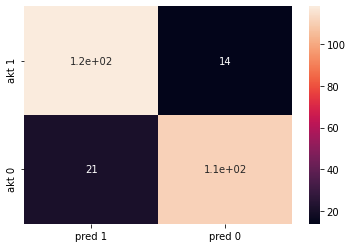

In [76]:
cm_logregOS=confusion_matrix(y_train_OverSample,y_osLogreg_train,labels=[1,0])
df_cm_logregOS=pd.DataFrame(data=cm_logregOS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_logregOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

In [77]:
print(classification_report(y_test, y_osLogreg))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



ini hasil evaluation matrix logistic regression


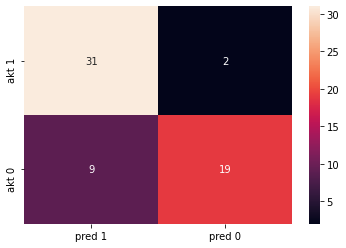

In [78]:
cm_logregOS_test=confusion_matrix(y_test,y_osLogreg,labels=[1,0])
df_cm_logregOS_test=pd.DataFrame(data=cm_logregOS_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_logregOS_test,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

# random forest over sampling

In [79]:
osRF = RandomForestClassifier()
osRF.fit(X_train_OverSample, y_train_OverSample)

RandomForestClassifier()

In [80]:
y_osRF = osRF.predict(X_test)
y_osRF_train = osRF.predict(X_train_OverSample)

In [81]:
print(classification_report(y_train_OverSample, y_osRF_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       132

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



ini hasil evaluation matrix logistic regression


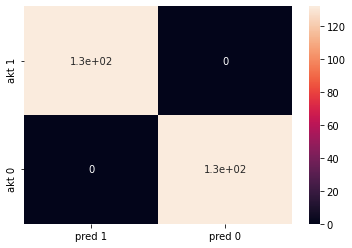

In [82]:
cm_RFOS=confusion_matrix(y_train_OverSample,y_osRF_train,labels=[1,0])
df_cm_rfOS=pd.DataFrame(data=cm_RFOS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_rfOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

In [93]:
print(classification_report(y_test, y_osRF))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



ini hasil evaluation matrix logistic regression


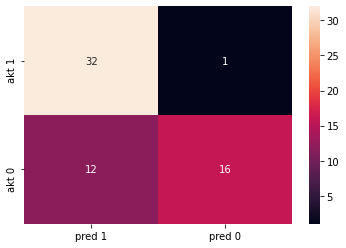

In [83]:
cm_rfOS_test=confusion_matrix(y_test,y_osRF,labels=[1,0])
df_cm_rfOS_test=pd.DataFrame(data=cm_rfOS_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_rfOS_test,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

## XGBOOST 

In [84]:
osXGB = XGBClassifier()
osXGB.fit(X_train_OverSample, y_train_OverSample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
y_osXGB = osXGB.predict(X_test)
y_osXGB_train = osXGB.predict(X_train_OverSample)

In [86]:
print(classification_report(y_train_OverSample, y_osXGB_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       132

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



ini hasil evaluation matrix logistic regression


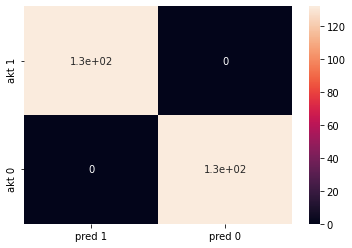

In [90]:
cm_XGBOS=confusion_matrix(y_train_OverSample,y_osXGB_train,labels=[1,0])
df_cm_XGBOS=pd.DataFrame(data=cm_XGBOS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_XGBOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

In [94]:
print(classification_report(y_test, y_osXGB))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



ini hasil evaluation matrix logistic regression


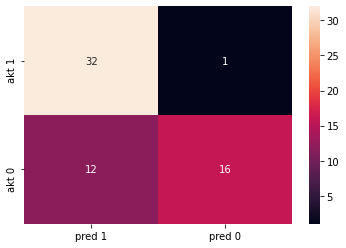

In [88]:
cm_xgbOS_test=confusion_matrix(y_test,y_osXGB,labels=[1,0])
df_cm_xgbOS_test=pd.DataFrame(data=cm_xgbOS_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_xgbOS_test,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

# hyper parameter tuning

In [95]:
tuned_LR = LogisticRegression(class_weight={0:.12, 1:.88})
tuned_LR.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression(class_weight={0: 0.12, 1: 0.88})

In [97]:
y_tune_LR = tuned_LR.predict(X_test)
y_tune_train_LR = tuned_LR.predict(X_train_OverSample)

In [99]:
print(classification_report(y_train_OverSample, y_tune_train_LR)) #train tuned

              precision    recall  f1-score   support

           0       0.97      0.58      0.72       132
           1       0.70      0.98      0.82       132

    accuracy                           0.78       264
   macro avg       0.84      0.78      0.77       264
weighted avg       0.84      0.78      0.77       264



ini hasil evaluation matrix logistic regression


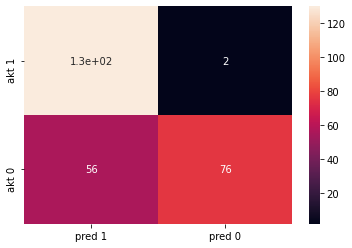

In [100]:
cm_tuneLROS=confusion_matrix(y_train_OverSample,y_tune_train_LR,labels=[1,0])
df_cm_lrOS=pd.DataFrame(data=cm_tuneLROS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_lrOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

In [101]:
print(classification_report(y_test, y_tune_LR))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62        28
           1       0.68      0.97      0.80        33

    accuracy                           0.74        61
   macro avg       0.80      0.72      0.71        61
weighted avg       0.79      0.74      0.72        61



ini hasil evaluation matrix logistic regression


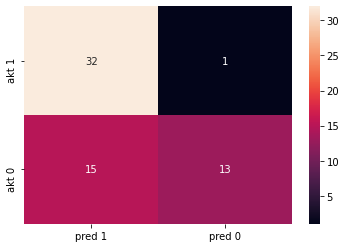

In [102]:
cm_LROS_test=confusion_matrix(y_test,y_tune_LR,labels=[1,0])
df_cm_LROS_test=pd.DataFrame(data=cm_LROS_test,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_LROS_test,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

## RANDOM Forest tuned over sampling

In [103]:
tune_RF = RandomForestClassifier()

param_RF ={"max_rom sklearn.model_selection import train_test_split, GridSearchCVdepth" : [None, 5, 7, 9],
          "min_samples_split" : [2, 9, 15],
          "min_samples_leaf" : [1, 2, 5],
          "max_features" : [None, .8, .7]}

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [106]:
model_RF = GridSearchCV(estimator=tune_RF, param_grid=param_RF, cv = 2, n_jobs=-1, verbose=1)

In [107]:
model_RF.fit(X_train_OverSample, y_train_OverSample)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.1min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 9],
                         'max_features': [None, 0.8, 0.7],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 9, 15]},
             verbose=1)

In [111]:
RF_tuned_OS = model_RF.best_estimator_
y_os_tuned_RF = RF_tuned_OS.predict(X_test)
y_os_tuned_train_RF = RF_tuned_OS.predict(X_train_OverSample)

In [112]:
print(classification_report(y_train_OverSample, y_tune_train_LR))

              precision    recall  f1-score   support

           0       0.97      0.58      0.72       132
           1       0.70      0.98      0.82       132

    accuracy                           0.78       264
   macro avg       0.84      0.78      0.77       264
weighted avg       0.84      0.78      0.77       264



ini hasil evaluation matrix logistic regression


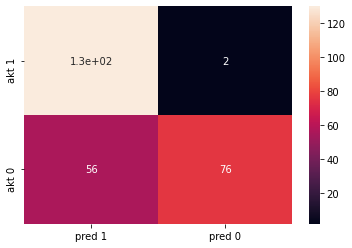

In [113]:
cm_tuneRFOS=confusion_matrix(y_train_OverSample,y_tune_train_LR,labels=[1,0])
df_cm_RFOS=pd.DataFrame(data=cm_tuneRFOS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_RFOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

In [115]:
print(classification_report(y_test, y_os_tuned_RF))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74        28
           1       0.74      0.97      0.84        33

    accuracy                           0.80        61
   macro avg       0.84      0.79      0.79        61
weighted avg       0.84      0.80      0.79        61



ini hasil evaluation matrix logistic regression


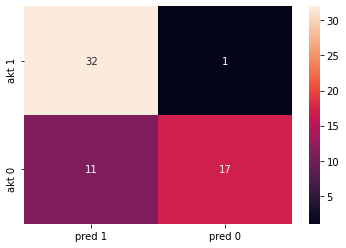

In [116]:
cm_tuneRFOS=confusion_matrix(y_test, y_os_tuned_RF,labels=[1,0])
df_cm_RFOS=pd.DataFrame(data=cm_tuneRFOS,columns=['pred 1','pred 0'],index=['akt 1','akt 0'])
sns.heatmap(df_cm_RFOS,annot=True)
print("ini hasil evaluation matrix logistic regression")
plt.show()

# xgboost tuning

In [120]:
tune_XGB = RandomForestClassifier()

param_XGB ={"max_rom sklearn.model_selection import train_test_split, GridSearchCVdepth" : [None, 5, 7, 9],
        "max_depth" : [6, 7],
         "learning_rate" : [.2, .3],
         "n_estimator" : [100, 300],
         "gamma" : [0, .1],
         "colsample_bytree" : [1, 2],
         "subsample" : [1, 2],
         "reg_alpha" : [0, 1],
         "reg_lambda" : [1, 2]}

In [121]:
model_xgb = GridSearchCV(estimator=tune_XGB, param_grid=param_XGB, cv = 2, n_jobs=-1, verbose=1)

In [122]:
model_xgb.fit(X_train_OverSample, y_train_OverSample)

Fitting 2 folds for each of 1024 candidates, totalling 2048 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter colsample_bytree for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
RF_tuned_OS = model_RF.best_estimator_
y_os_tuned_RF = RF_tuned_OS.predict(X_test)
y_os_tuned_train_RF = RF_tuned_OS.predict(X_train_OverSample)

## conclusion

- after we do hyper parameter especially in random forest we saw some increase aspect like recall but logistic regression has some increase evaluation matrix too
- when we use random forest tuning we can decrease false negative in confusion matrix
- after we hyper parameter the logistic regression and random forest , the result unstabile, so we need do more reasearch in parameter on both

In [118]:
import joblib
joblib.dump(LogisticRegression,'anything')

['anything']

# Recommendation
- for the further research , do the under sampling in this datasets ant try another a random forest or xgboost
- from the eda we can see that the outliers doesnt bother the machine because the value doesnt bother the model